In [36]:
import numba

import numpy as np
import matplotlib.pyplot as plt

import time


In [37]:
rhos = [0.1, 0.01, 0.001]
simulations_per_rho = 100
steps_per_sim = [int(1e5), int(1e6), int(1e7)]

In [38]:
@numba.jit
def simulation(rho=0.1, steps=100, runs=1):
    groups = np.zeros((runs, steps), dtype=np.int32)
    groups[:, 0] = 1
    next_group_id = np.ones(runs, dtype=np.int32)
    elements = np.zeros((runs, steps), dtype=np.int32)
    choices = np.random.random((runs, steps))
    for run_id in range(runs):
        for i in range(1, steps - 1):
            if choices[run_id, i] < rho:
                curr_element = next_group_id[run_id]
                next_group_id[run_id] += 1
            else:
                copy_id = np.random.randint(i)
                curr_element = elements[run_id, copy_id]
            elements[run_id,  i] = curr_element
                
            groups[run_id, curr_element] =  groups[run_id, curr_element] +  1
        
    return (groups, elements, next_group_id)
_ = simulation()

(array([[75,  3,  1, 13,  1,  2,  1,  2,  1,  0,  0,  0,  0,  0,  0,  0,
          0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
          0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
          0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
          0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
          0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
          0,  0,  0,  0]], dtype=int32),
 array([[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 2, 3, 0, 0, 3, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 3, 0, 0, 3, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 3, 0, 3, 1,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 3, 0, 0, 0, 5, 0,
         6, 0, 0, 1, 3, 0, 3, 0, 0, 7, 3, 7, 5, 0, 0, 0, 0, 3, 0, 0, 0, 8,
         0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0]], dtype=int32),
 array([9], dtype=int32))

In [39]:

results = [None] * len(rhos)
for n in range(len(rhos)):
    t0 = time.time()
    results[n] = simulation(rho=rhos[n], steps=steps_per_sim[n], runs=simulations_per_rho)
    t1 = time.time()
    print("took: %.2f"%(t1-t0))

took: 0.54
took: 3.73
took: 143.58


[326860  46973  10755   6261    851  13598   1282   1503   2234   1809]
[323611  13262   1041  18102   5879  12022   3260   2167   7637   2561]
[101839 238310    746   5173   4296   9291   3262   7499  30240   3377]
[156564  84572 106242   5771  13138   2195   1141   2528  11914   1915]
[332541  15097  11157    575   1906   8230    229   2850   9829  13499]
[292639   2431  38730   8280  30166  13936  10529  12471   6384   3817]
[369645  10447   3028  10709   3402   3412    891   7527   1782   1300]
[309435  14277   8408   5659   4624   3226  14457  11015   7585   5888]
[260952  68247  36667   2761   5243  16597     95   5596   5655   4340]
[157125   7870  60236  73959  32674   2571  47563  10345   3350   1942]


(0, 99749)

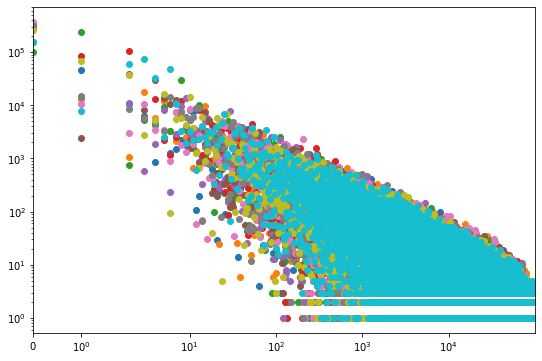

In [15]:
fig, ax = plt.subplots(1, figsize=(9,6))
for i in range(10):
    ax.scatter(np.arange(results[0][2][i]), results[0][0][i, :results[0][2][i]])
    print(results[0][0][i, :10])
ax.set_yscale("log")
ax.set_xscale("symlog")
ax.set_xlim((0, np.max(results[0][2][:1])))

[898234   2472  27239   6550    779    289   1475    303    599    422]
[905355   3918    562   3685   5079   2287   2658   7220    808   2188]
[921258    103   2674     55   2767   2829   3704     66    707    529]
[803454 122609   1363   4179     74   1663    371    870    437    895]
[869124  20878    154   3956  17337    425   2685    824   1405   2736]
[710254 170754  42926   1244   2739   1559    835    688    366   1151]
[900982  26906   2487   1082   3529   1776    178     51     80    667]
[871468  44053   3440   2612    123    805   1954   1279   3424   1416]
[900031   4814   2801   7399   2210   3025   3476   2612   2585   1177]
[887244  30684  12686   1526    410    438     69   1098    345    214]


(0, 9928)

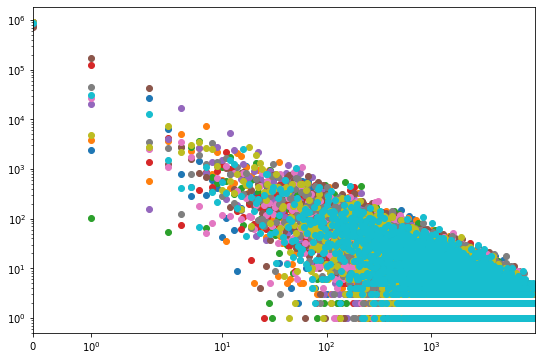

In [16]:
fig, ax = plt.subplots(1, figsize=(9,6))
for i in range(10):
    ax.scatter(np.arange(results[1][2][i]), results[1][0][i, :results[1][2][i]])
    print(results[1][0][i, :10])
ax.set_yscale("log")
ax.set_xscale("symlog")
ax.set_xlim((0, np.max(results[1][2][:1])))

[3.440127e+04 7.232280e+03 3.158230e+03 ... 1.000000e-02 1.000000e-02
 1.000000e-02]


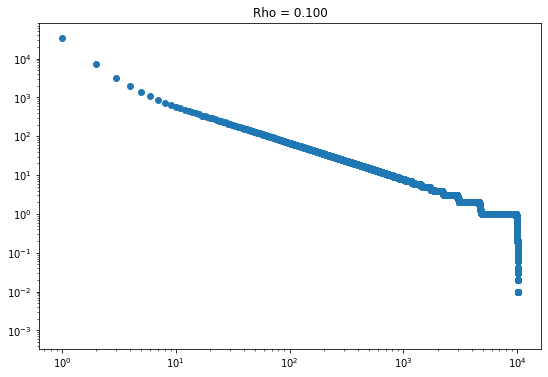

[8.8375791e+05 2.7405430e+04 8.7731200e+03 ... 2.0000000e-02 2.0000000e-02
 2.0000000e-02]


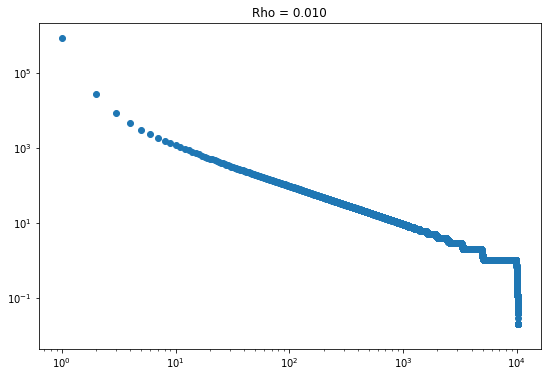

[9.84291212e+06 6.14603100e+04 1.16110900e+04 ... 1.00000000e-02
 1.00000000e-02 1.00000000e-02]


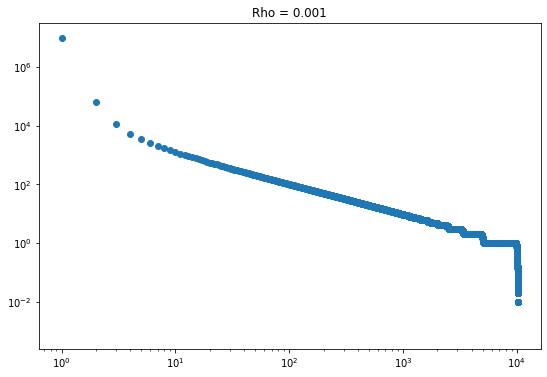

In [40]:

for i in range(len(rhos)):
    tmp = results[i]
    group_counts = tmp[0]
    sorted_groups = np.flip(np.sort(group_counts))
    max_index = np.max(tmp[2]) - 1
    group_means = np.mean(sorted_groups[:, :max_index], axis=0)
    print(group_means)


    fig, ax = plt.subplots(1, figsize=(9,6))
    ax.scatter(np.arange(1, max_index+1), group_means)
    ax.set_yscale("log")
    ax.set_xscale("log")
    plt.title("Rho = %.3f"%rhos[i])
    plt.show()